Trabajo elaborado por:

- David Alberto Padrón Sánchez A01663806
- Luis Emiliano Luna Malvaez A01784246

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
aguacate = pd.read_csv("avocado.csv")

In [4]:
display(aguacate.head(10))
aguacate.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<ipython-input-5-a4c6778846fb>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  aguacate.drop(['Total Volume'],1).hist()


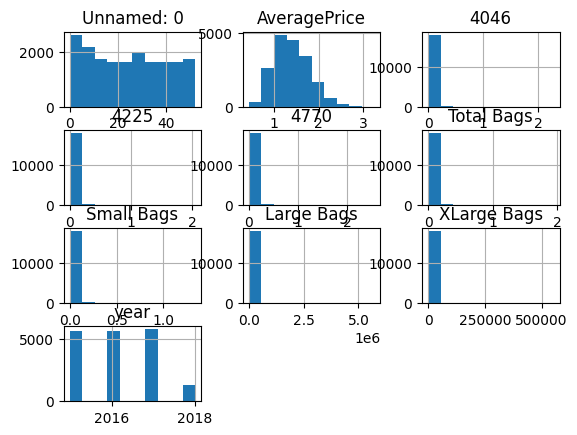

In [5]:
aguacate.drop(['Total Volume'],1).hist()
plt.show()

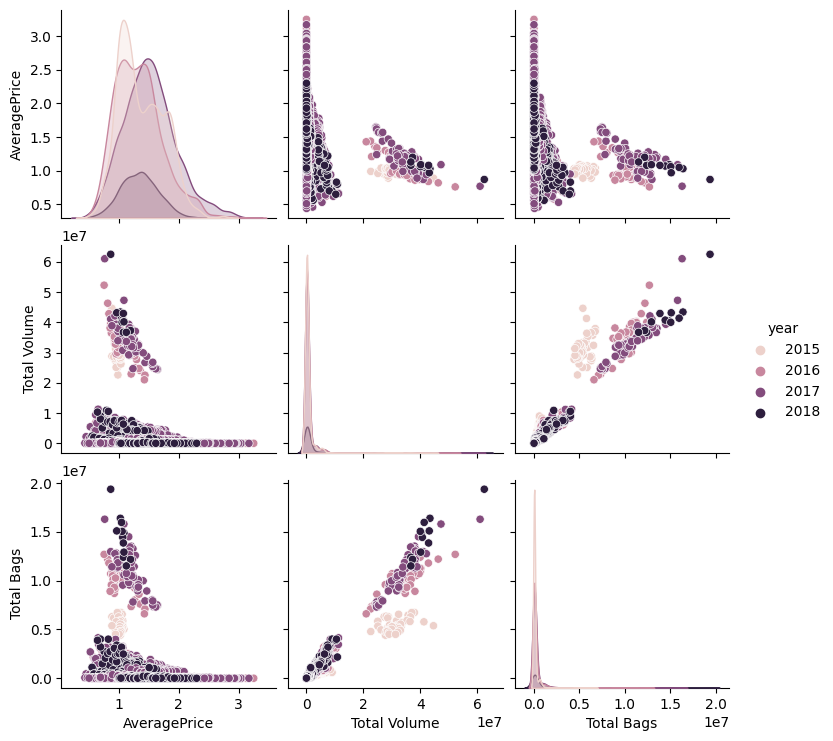

In [8]:
sns.pairplot(aguacate.dropna(), hue='year',vars=["AveragePrice","Total Volume","Total Bags"],kind='scatter')

In [18]:
X = np.array(aguacate[["AveragePrice","Total Volume","Total Bags"]])
y = np.array(aguacate['year'])
X
y

array([2015, 2015, 2015, ..., 2018, 2018, 2018])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

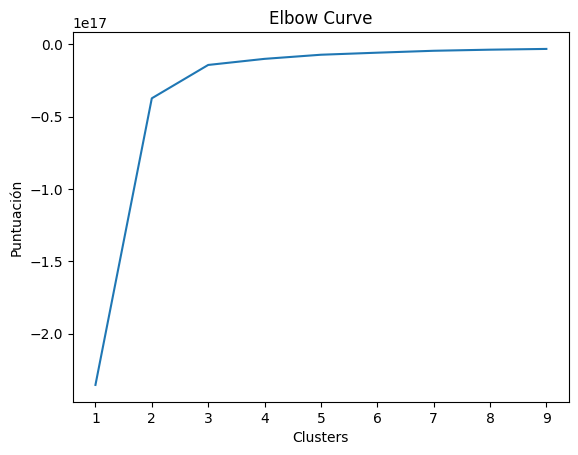

In [26]:
n = range(1, 10)
kms = [KMeans(n_clusters=i) for i in n]
kms
score = [kms[i].fit(X).score(X) for i in range(len(kms))]
plt.plot(n,score)
plt.xlabel('Clusters')
plt.ylabel('Puntuación')
plt.title('Elbow Curve')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.40891316e+00 5.43262224e+05 1.55972485e+05]
 [1.09201183e+00 3.37350390e+07 9.19049275e+06]]


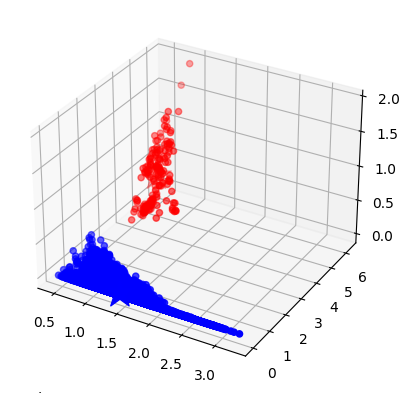

In [57]:
kms = KMeans(n_clusters=2).fit(X)
centro = kms.cluster_centers_
print(centro)
label = kms.predict(X)
C = kms.cluster_centers_
colores=['blue','red']
asignar=[]
for row in label:
  asignar.append(colores[row])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=20)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=500)

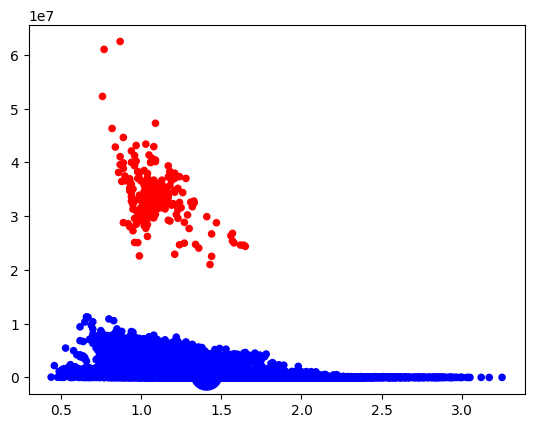

In [58]:
v = aguacate['AveragePrice'].values
v2 = aguacate['Total Volume'].values
plt.scatter(v, v2, c=asignar, s=20)
plt.scatter(C[:, 0], C[:, 1], c=colores, s=500)

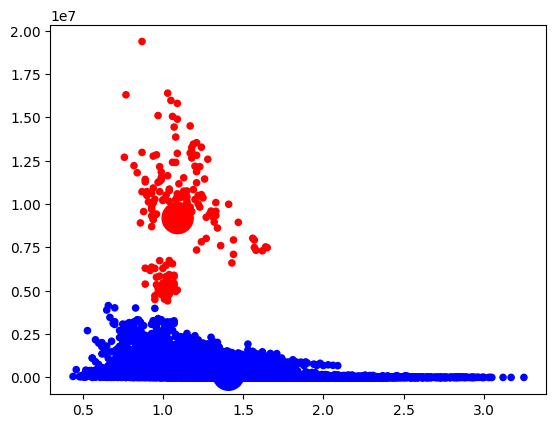

In [61]:
v = aguacate['AveragePrice'].values
v2 = aguacate['Total Bags'].values
plt.scatter(v, v2, c=asignar, s=20)
plt.scatter(C[:, 0], C[:, 2], c=colores, s=500)

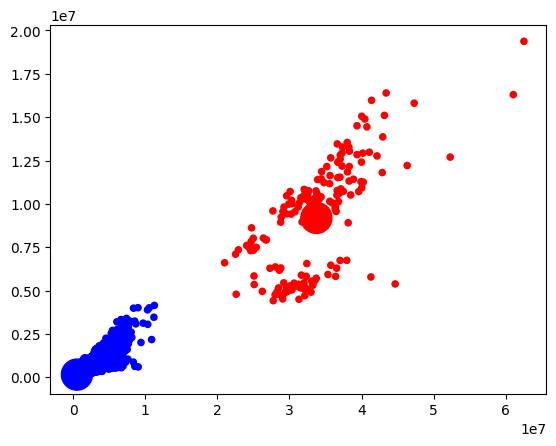

In [60]:
v = aguacate['Total Volume'].values
v2 = aguacate['Total Bags'].values
plt.scatter(v, v2, c=asignar, s=20)
plt.scatter(C[:, 1], C[:, 2],c=colores, s=500)

In [62]:
copy = pd.DataFrame()
copy['type']=aguacate['type'].values
copy['year']=aguacate['year'].values
copy['label'] = label;

cant = pd.DataFrame()

cant['color']=colores
cant['cantidad']=copy.groupby('label').size()
cant

,color,cantidad
0,blue,18080
1,red,169


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.17377687e+00 2.96948758e+06 8.63649291e+05]
 [1.02289855e+00 3.91973895e+07 1.17022427e+07]
 [9.76481149e-01 6.00064391e+06 1.60604672e+06]
 [1.13970000e+00 2.99660171e+07 7.45738526e+06]
 [1.43735465e+00 2.16283874e+05 6.53710350e+04]]


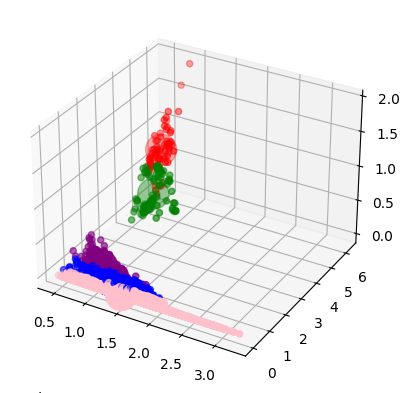

In [65]:
kms = KMeans(n_clusters=5).fit(X)
centro = kms.cluster_centers_
print(centro)
labels = kms.predict(X)
C = kms.cluster_centers_
colors=['blue','red','purple','green','pink']
asignar=[]
for row in labels:
  asignar.append(colors[row])
figura = plt.figure()
x = figura.add_subplot(111, projection='3d')
x.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=20)
x.scatter(C[:, 0], C[:, 1], C[:, 2], c=colors, s=500)

Los centros del análisis de clustering son los puntos clave en la agrupación de datos.

Los círculos rellenos representan de manera efectiva el centro de los datos, proporcionando una representación significativa de cada grupo.


Para determinar el valor óptimo de "k" podemos visualizar los datos y evaluar su dispersión. Examinamos las intersecciones en los gráficos para asegurarnos de que los datos estén concentrados en los diagramas indicando su efectividad de análisis de esta manera.

Podemos determinar el número óptimo de clústeres a representar construyendo una elbow curve, aunque esta curva no mostró una transición suave, sino más bien una inclinación recta.

Su usamos K más alto, los centros serían menos representativos y sería una dispersión de datos más grande, pero si usamos K más bajo los centros van a representar grupos más grandes y sin diferencia mayor.

Los centros están bastante separados entre sí demostrando una buena diferenciación entre los grupos y facilitan la identificación de las características únicas de cada grupo.

En caso de tener muchos outliers en el análisis de cajas y bigotes, los centros se verían afectados y no podríamos confiar en que sea un valor real. Los outliers pueden distorsionar la ubicación de los centros.

Con respecto a los centros podemos observar que los datos están dispersos y que los centros varían entre los diferentes clusters.
Dependiendo del año puede haber más "Total Bags" en relación con el "Average Price" o una tendencia variable entre "Total Bags" y el "Total Volume". Esto sugiere que la agrupación revela patrones interesantes en los datos, lo que puede ser valioso para el análisis y la toma de decisiones.
